<a href="https://colab.research.google.com/github/Copperhorse/edge_iiot/blob/main/processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loadin the data and finding insights

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras import models
from keras import layers
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import class_weight
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,  make_scorer,matthews_corrcoef

In [ ]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/edgeiiotset-cyber-security-dataset-of-iot-iiot


In [ ]:
path = path + "/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv"

In [ ]:
df = pd.read_csv(path, low_memory=False)

In [ ]:
df.head()

,frame.time,ip.src_host,ip.dst_host,arp.dst.proto_ipv4,arp.opcode,arp.hw.size,arp.src.proto_ipv4,icmp.checksum,icmp.seq_le,icmp.transmit_timestamp,...,mqtt.proto_len,mqtt.protoname,mqtt.topic,mqtt.topic_len,mqtt.ver,mbtcp.len,mbtcp.trans_id,mbtcp.unit_id,Attack_label,Attack_type
0,2021 11:44:10.081753000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
1,2021 11:44:10.162218000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,4.0,MQTT,0,0.0,4.0,0.0,0.0,0.0,0,Normal
2,2021 11:44:10.162271000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
3,2021 11:44:10.162641000,192.168.0.128,192.168.0.101,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0,Normal
4,2021 11:44:10.166132000,192.168.0.101,192.168.0.128,0,0.0,0.0,0,0.0,0.0,0.0,...,0.0,0,Temperature_and_Humidity,24.0,0.0,0.0,0.0,0.0,0,Normal


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219201 entries, 0 to 2219200
Data columns (total 63 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   frame.time                 object 
 1   ip.src_host                object 
 2   ip.dst_host                object 
 3   arp.dst.proto_ipv4         object 
 4   arp.opcode                 float64
 5   arp.hw.size                float64
 6   arp.src.proto_ipv4         object 
 7   icmp.checksum              float64
 8   icmp.seq_le                float64
 9   icmp.transmit_timestamp    float64
 10  icmp.unused                float64
 11  http.file_data             object 
 12  http.content_length        float64
 13  http.request.uri.query     object 
 14  http.request.method        object 
 15  http.referer               object 
 16  http.request.full_uri      object 
 17  http.request.version       object 
 18  http.response              float64
 19  http.tls_port              float64
 20  tc

Finding missing values, there are none

In [ ]:
df.isnull().sum()

,0
frame.time,0
ip.src_host,0
ip.dst_host,0
arp.dst.proto_ipv4,0
arp.opcode,0
...,...
mbtcp.len,0
mbtcp.trans_id,0
mbtcp.unit_id,0
Attack_label,0


- dropping useless columns
- dropping null values if there are any
- dropping duplicates if there are any

In [ ]:
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4",
                "arp.dst.proto_ipv4","http.file_data","http.request.full_uri",
                "icmp.transmit_timestamp","http.request.uri.query", "tcp.options",
                "tcp.payload","tcp.srcport","tcp.dstport", "udp.port", "mqtt.msg"]

df.drop(drop_columns, axis=1, inplace=True)
df.dropna(axis=0, how='any', inplace=True)
df.drop_duplicates(subset=None, keep="first", inplace=True)
df = shuffle(df)
df.isna().sum()

df.columns

Index(['arp.opcode', 'arp.hw.size', 'icmp.checksum', 'icmp.seq_le',
       'icmp.unused', 'http.content_length', 'http.request.method',
       'http.referer', 'http.request.version', 'http.response',
       'http.tls_port', 'tcp.ack', 'tcp.ack_raw', 'tcp.checksum',
       'tcp.connection.fin', 'tcp.connection.rst', 'tcp.connection.syn',
       'tcp.connection.synack', 'tcp.flags', 'tcp.flags.ack', 'tcp.len',
       'tcp.seq', 'udp.stream', 'udp.time_delta', 'dns.qry.name',
       'dns.qry.name.len', 'dns.qry.qu', 'dns.qry.type', 'dns.retransmission',
       'dns.retransmit_request', 'dns.retransmit_request_in',
       'mqtt.conack.flags', 'mqtt.conflag.cleansess', 'mqtt.conflags',
       'mqtt.hdrflags', 'mqtt.len', 'mqtt.msg_decoded_as', 'mqtt.msgtype',
       'mqtt.proto_len', 'mqtt.protoname', 'mqtt.topic', 'mqtt.topic_len',
       'mqtt.ver', 'mbtcp.len', 'mbtcp.trans_id', 'mbtcp.unit_id',
       'Attack_label', 'Attack_type'],
      dtype='object')

encoding the data, to turn object data type into numerical data type

In [ ]:
def encode_text_dummy(df, name):

    dummies = pd.get_dummies(df[name])

    for x in dummies.columns:

        dummy_name = f"{name}-{x}"

        df[dummy_name] = dummies[x]

    df.drop(name, axis=1, inplace=True)

encode_text_dummy(df,'http.request.method')
encode_text_dummy(df,'http.referer')
encode_text_dummy(df,"http.request.version")
encode_text_dummy(df,"dns.qry.name.len")
encode_text_dummy(df,"mqtt.conack.flags")
encode_text_dummy(df,"mqtt.protoname")
encode_text_dummy(df,"mqtt.topic")


<ipython-input-10-a311b103b8a6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=attack_counts.index, x=attack_counts.values, palette="muted")


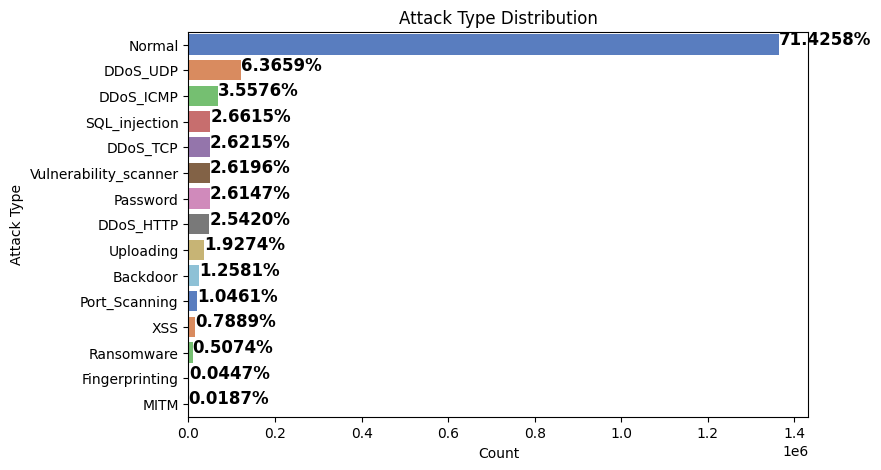

In [ ]:
attack_counts = df['Attack_type'].value_counts()
plt.figure(figsize=(8, 5))

total = sum(attack_counts.values)
percentages = [f"{(v / total) * 100:.4f}%" for v in attack_counts.values]

ax = sns.barplot(y=attack_counts.index, x=attack_counts.values, palette="muted")

for i, (v, label) in enumerate(zip(attack_counts.values, percentages)):
    ax.text(v + 1, i, label, ha='left', fontsize=12, fontweight='bold')

plt.xlabel('Count')
plt.ylabel('Attack Type')
plt.title('Attack Type Distribution')

plt.show()

<ipython-input-11-3566b85b6c57>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=attack_count_without_normal.index, x=attack_count_without_normal.values, palette="muted")


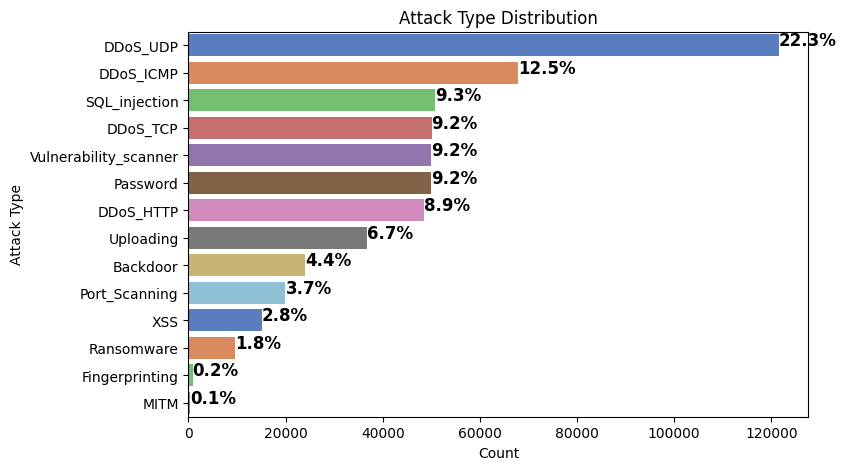

In [ ]:
attack_count_without_normal = attack_counts.drop('Normal')
plt.figure(figsize=(8, 5))

total = sum(attack_count_without_normal.values)
percentages = [f"{(v / total) * 100:.1f}%" for v in attack_count_without_normal.values]

ax = sns.barplot(y=attack_count_without_normal.index, x=attack_count_without_normal.values, palette="muted")

for i, (v, label) in enumerate(zip(attack_count_without_normal.values, percentages)):
    ax.text(v + 1, i, label, ha='left', fontsize=12, fontweight='bold')

plt.xlabel('Count')
plt.ylabel('Attack Type')
plt.title('Attack Type Distribution')

plt.show()

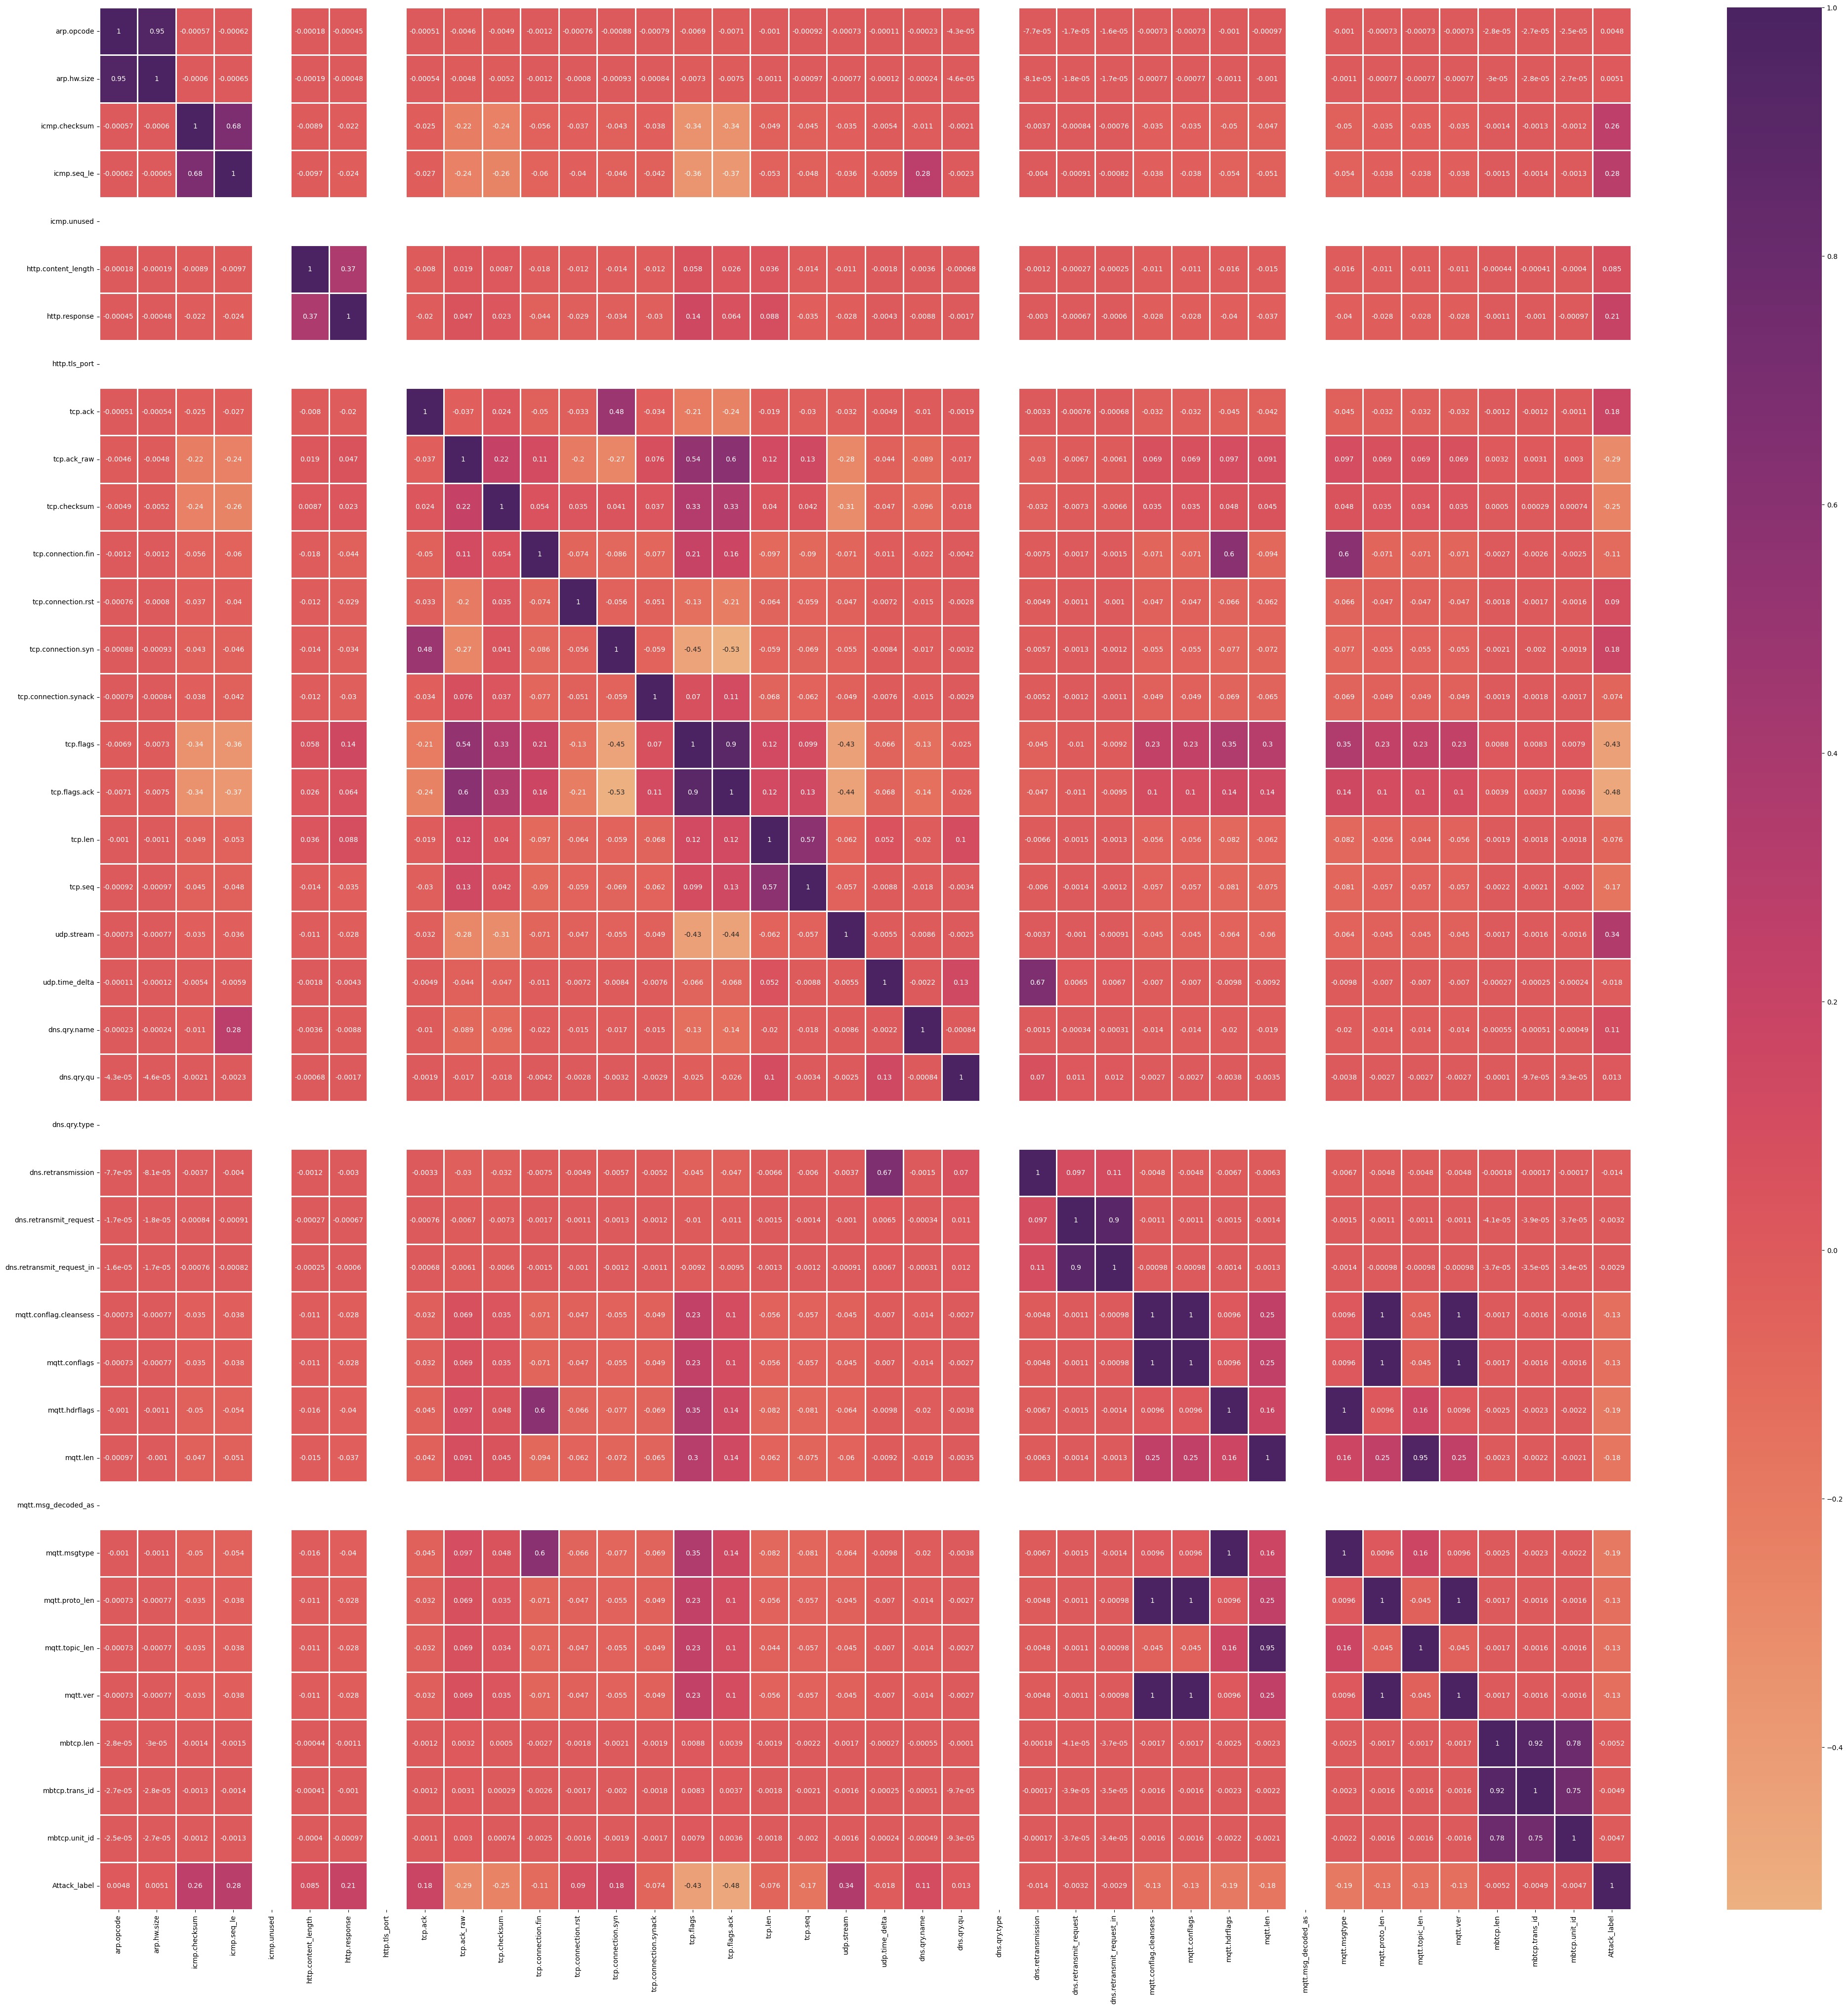

In [ ]:
## Checking correlation between the columns
fig = plt.figure(figsize=(50,50))
correlation = df.select_dtypes(include=np.number).corr()
correlation
sns.heatmap(correlation, annot=True, cmap='flare',linewidths=2)
plt.show()

In [ ]:
zero_list = ["icmp.unused", "http.tls_port", "dns.qry.type", "mqtt.msg_decoded_as"]
Feature_dataset = df.drop(zero_list, axis=1)



In [ ]:
Feature_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1909671 entries, 2059780 to 924390
Data columns (total 93 columns):
 #   Column                                                                                                Dtype  
---  ------                                                                                                -----  
 0   arp.opcode                                                                                            float64
 1   arp.hw.size                                                                                           float64
 2   icmp.checksum                                                                                         float64
 3   icmp.seq_le                                                                                           float64
 4   http.content_length                                                                                   float64
 5   http.response                                                                

In [ ]:
attack_type = Feature_dataset["Attack_type"]
attack_label = Feature_dataset["Attack_label"]

In [ ]:
Feature_dataset.drop(["Attack_type", "Attack_label"], axis=1, inplace=True)

## FINDING MOST IMPORTANT FEATURES USING RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from tqdm import tqdm
import numpy as np
import pandas as pd

X = Feature_dataset  # Separate features
y = attack_type  # Save the target variable

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Wrap tqdm around the fit method to show progress
with tqdm(total=1, desc="Training RandomForest") as pbar:
    rf.fit(X, y)
    pbar.update(1)  # Update progress bar

# Create a selector object that will keep features with importance greater than a threshold
selector = SelectFromModel(rf, threshold=0.01)

# Wrap tqdm around selector fitting process
with tqdm(total=1, desc="Selecting Features") as pbar:
    selector.fit(X, y)
    pbar.update(1)

# Get the selected features
selected_features = X.columns[selector.get_support()]

# Create a new dataframe with only the selected features + attack_type
X_selected = X[selected_features]
Feature_dataset = pd.concat([X_selected, y], axis=1)  # Add attack_type back

# Print the selected features
print("Selected features:", selected_features)

# Now Feature_dataset contains the selected features + attack_type


Selecting Features: 100%|██████████| 1/1 [03:54<00:00, 234.68s/it]


Selected features: Index(['icmp.checksum', 'icmp.seq_le', 'tcp.ack', 'tcp.ack_raw',
       'tcp.checksum', 'tcp.flags', 'tcp.len', 'tcp.seq', 'udp.stream',
       'http.request.method-0', 'http.request.method-0.0', 'http.referer-0',
       'http.referer-0.0', 'http.request.version-0',
       'http.request.version-0.0', 'dns.qry.name.len-0',
       'dns.qry.name.len-0.0', 'mqtt.conack.flags-0', 'mqtt.conack.flags-0.0',
       'mqtt.protoname-0', 'mqtt.protoname-0.0', 'mqtt.topic-0',
       'mqtt.topic-0.0'],
      dtype='object')


In [ ]:
Feature_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1909671 entries, 2059780 to 924390
Data columns (total 24 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   icmp.checksum             float64
 1   icmp.seq_le               float64
 2   tcp.ack                   float64
 3   tcp.ack_raw               float64
 4   tcp.checksum              float64
 5   tcp.flags                 float64
 6   tcp.len                   float64
 7   tcp.seq                   float64
 8   udp.stream                float64
 9   http.request.method-0     bool   
 10  http.request.method-0.0   bool   
 11  http.referer-0            bool   
 12  http.referer-0.0          bool   
 13  http.request.version-0    bool   
 14  http.request.version-0.0  bool   
 15  dns.qry.name.len-0        bool   
 16  dns.qry.name.len-0.0      bool   
 17  mqtt.conack.flags-0       bool   
 18  mqtt.conack.flags-0.0     bool   
 19  mqtt.protoname-0          bool   
 20  mqtt.protoname-0.0      

In [ ]:

# Feature_dataset.to_csv('preprocessed_data.csv', index=False)


In [ ]:
Feature_dataset.drop("Attack_type", axis=1, inplace=True)

In [ ]:
Feature_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1909671 entries, 2059780 to 924390
Data columns (total 23 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   icmp.checksum             float64
 1   icmp.seq_le               float64
 2   tcp.ack                   float64
 3   tcp.ack_raw               float64
 4   tcp.checksum              float64
 5   tcp.flags                 float64
 6   tcp.len                   float64
 7   tcp.seq                   float64
 8   udp.stream                float64
 9   http.request.method-0     bool   
 10  http.request.method-0.0   bool   
 11  http.referer-0            bool   
 12  http.referer-0.0          bool   
 13  http.request.version-0    bool   
 14  http.request.version-0.0  bool   
 15  dns.qry.name.len-0        bool   
 16  dns.qry.name.len-0.0      bool   
 17  mqtt.conack.flags-0       bool   
 18  mqtt.conack.flags-0.0     bool   
 19  mqtt.protoname-0          bool   
 20  mqtt.protoname-0.0      

## SPLITTING THE DATASET


In [ ]:
X_train, X_temp, y_binary_train, y_binary_temp, y_multi_train, y_multi_temp = train_test_split(
    Feature_dataset, attack_label, attack_type,
    test_size=0.2, stratify=attack_type, random_state=42)
X_val, X_test, y_binary_val, y_binary_test, y_multi_val, y_multi_test = train_test_split(
    X_temp, y_binary_temp, y_multi_temp,
    test_size=0.5, stratify=y_multi_temp, random_state=42)


## ONE HOT ENCODING

## Generating class weights

In [ ]:
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                        classes=np.unique(y_binary_train),
                                        y=y_binary_train)

class_weights_dict = dict(zip(np.unique(y_binary_train), class_weights))

class_weights_multi = class_weight.compute_class_weight(class_weight='balanced',
                                        classes=np.unique(y_multi_train),
                                        y=y_multi_train)
class_weights_multi_dict = dict(zip(np.unique(y_multi_train), class_weights_multi))

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Fit the encoder to all unique attack types
all_attack_types = pd.concat([y_multi_train, y_multi_val, y_multi_test]).unique()
label_encoder.fit(all_attack_types)

# Transform the attack type columns to numerical labels
y_multi_train = label_encoder.transform(y_multi_train)
y_multi_val = label_encoder.transform(y_multi_val)
y_multi_test = label_encoder.transform(y_multi_test)

# Now apply to_categorical
y_multi_train = to_categorical(y_multi_train)
y_multi_val = to_categorical(y_multi_val)
y_multi_test = to_categorical(y_multi_test)

In [ ]:
len(class_weights_multi_dict)

15

In [ ]:
print(class_weights_multi_dict)

{'Backdoor': np.float64(5.298843279052425), 'DDoS_HTTP': np.float64(2.622610188403931), 'DDoS_ICMP': np.float64(1.8739133901246834), 'DDoS_TCP': np.float64(2.5430478568456096), 'DDoS_UDP': np.float64(1.047258867764148), 'Fingerprinting': np.float64(149.33880742913001), 'MITM': np.float64(356.1156177156177), 'Normal': np.float64(0.09333692571528418), 'Password': np.float64(2.549668719437908), 'Port_Scanning': np.float64(6.37273599466066), 'Ransomware': np.float64(13.140119554466091), 'SQL_injection': np.float64(2.5048342801865835), 'Uploading': np.float64(3.458842174375693), 'Vulnerability_scanner': np.float64(2.544890599102138), 'XSS': np.float64(8.450100943057054)}


## STANDARD SCALING

In [ ]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


## MODELING

creating a model without using stratified k-folds or hyperparameter tuning, these will be applied after i have found a suitable model.

Random Forest Accuracy: 1.0
training accuracy 1.0


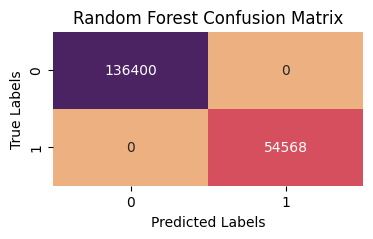

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    136400
           1       1.00      1.00      1.00     54568

    accuracy                           1.00    190968
   macro avg       1.00      1.00      1.00    190968
weighted avg       1.00      1.00      1.00    190968



In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(class_weight=class_weights_dict,n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_classifier.fit(X_train, y_binary_train)
y_pred_rf = rf_classifier.predict(X_test)
y_train_pred_rf = rf_classifier.predict(X_train)
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_binary_test, y_pred_rf)
accuracy_train_rf = accuracy_score(y_binary_train, y_train_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)
print("training accuracy",accuracy_train_rf)

# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_binary_test, y_pred_rf)
plt.figure(figsize=(4, 2))
sns.heatmap(cm_rf, annot=True, cmap="flare", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Random Forest Confusion Matrix")
plt.show()

print(classification_report(y_binary_test, y_pred_rf))


random forest for 15-class classification

In [ ]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(class_weight='balanced',n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_classifier.fit(X_train, y_multi_train)
y_pred_rf = rf_classifier.predict(X_test)
y_train_pred_rf = rf_classifier.predict(X_train)
# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_multi_test, y_pred_rf)
accuracy_train_rf = accuracy_score(y_multi_train, y_train_pred_rf)





In [ ]:
print("Random Forest Accuracy:", accuracy_rf)
print("training accuracy",accuracy_train_rf)

Random Forest Accuracy: 0.9808920866323153
training accuracy 0.999168704540575


In [ ]:
print(classification_report(y_pred_rf, y_multi_test))
print(classification_report(y_train_pred_rf, y_multi_train))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2344
           1       0.94      0.94      0.94      4863
           2       1.00      1.00      1.00      6794
           3       1.00      1.00      1.00      5006
           4       1.00      1.00      1.00     12157
           5       0.74      0.81      0.77        78
           6       1.00      1.00      1.00        36
           7       1.00      1.00      1.00    136400
           8       0.81      0.85      0.83      4780
           9       1.00      0.96      0.98      2081
          10       0.92      0.94      0.93       947
          11       0.82      0.85      0.84      4874
          12       0.78      0.86      0.82      3346
          13       0.96      0.98      0.97      4861
          14       0.83      0.85      0.84      1464

   micro avg       0.98      0.99      0.98    190031
   macro avg       0.92      0.94      0.93    190031
weighted avg       0.98   

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


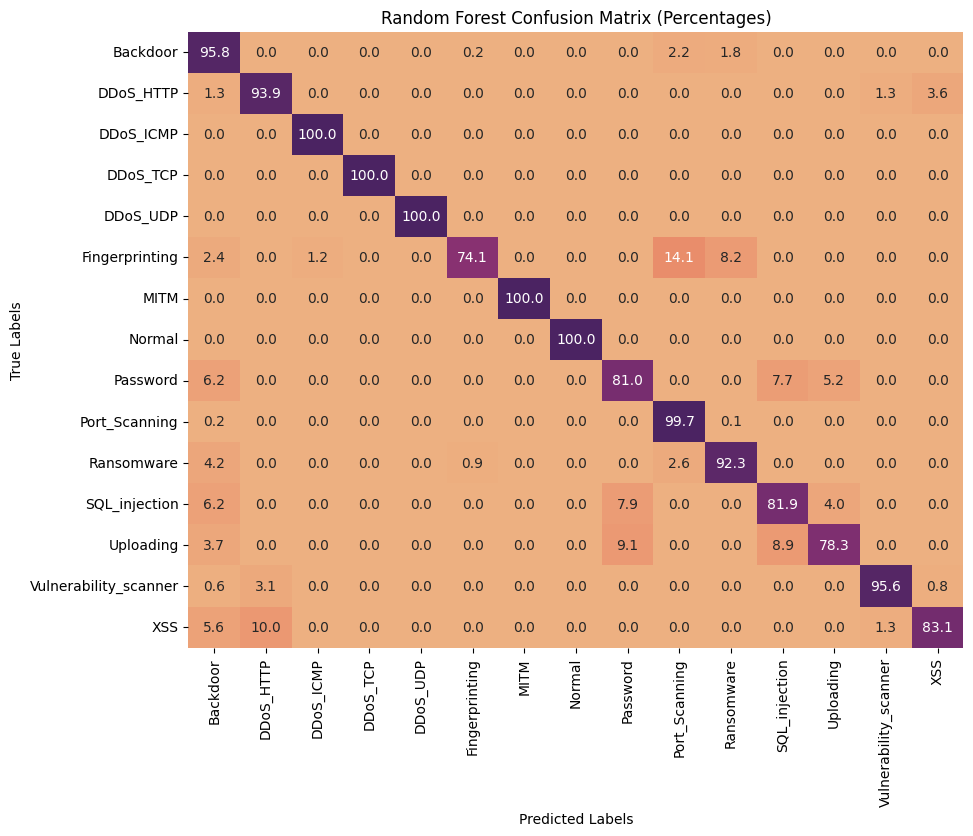

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# ... (previous code) ...

# Convert one-hot encoded labels to multiclass format
y_multi_test_class = np.argmax(y_multi_test, axis=1)
y_pred_rf_class = np.argmax(y_pred_rf, axis=1)

# Now calculate the confusion matrix
cm_rf = confusion_matrix(y_multi_test_class, y_pred_rf_class)

# Get label names (assuming you have them in a variable called 'labels')
# If you don't have 'labels', replace with a list of your label names
labels = label_encoder.classes_ # Replace with your label names if needed

# Normalize the confusion matrix to percentages
cm_rf_percent = cm_rf.astype('float') / cm_rf.sum(axis=1)[:, np.newaxis] * 100

# Create a heatmap with percentages and labels
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.heatmap(cm_rf_percent, annot=True, fmt=".1f", cmap="flare",
            xticklabels=labels, yticklabels=labels, cbar=False)

plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Random Forest Confusion Matrix (Percentages)")
plt.show()

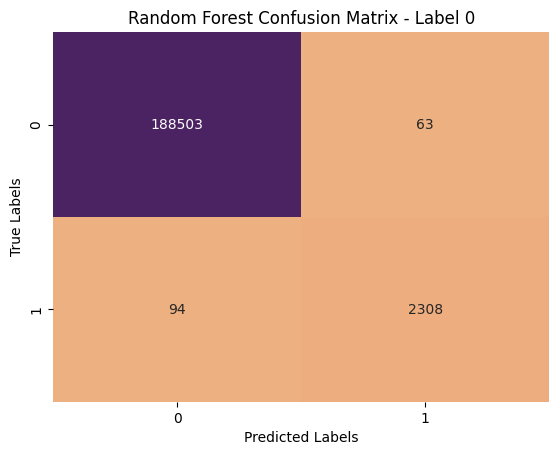

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix

    # Calculate confusion matrix for each label
cm_rf = multilabel_confusion_matrix(y_multi_test, y_pred_rf)


import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm_rf[0], annot=True, cmap="flare", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Random Forest Confusion Matrix - Label 0")
plt.show()

Logistic Regression Accuracy: 1.0
Logistic Regression Training Accuracy: 1.0


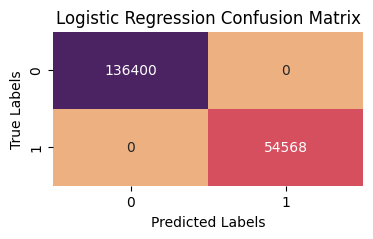

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    136400
           1       1.00      1.00      1.00     54568

    accuracy                           1.00    190968
   macro avg       1.00      1.00      1.00    190968
weighted avg       1.00      1.00      1.00    190968



In [ ]:
# prompt: logistic regression on binary dataset

# Logistic Regression for binary classification
from sklearn.linear_model import LogisticRegression

logreg_classifier = LogisticRegression(class_weight=class_weights_dict, random_state=42)
logreg_classifier.fit(X_train, y_binary_train)
y_pred_logreg = logreg_classifier.predict(X_test)
y_train_pred_logreg = logreg_classifier.predict(X_train)

# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_binary_test, y_pred_logreg)
accuracy_train_logreg = accuracy_score(y_binary_train, y_train_pred_logreg)

print("Logistic Regression Accuracy:", accuracy_logreg)
print("Logistic Regression Training Accuracy:", accuracy_train_logreg)

# Confusion Matrix for Logistic Regression
cm_logreg = confusion_matrix(y_binary_test, y_pred_logreg)
plt.figure(figsize=(4, 2))
sns.heatmap(cm_logreg, annot=True, cmap="flare", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

print(classification_report(y_binary_test, y_pred_logreg))


binary classification

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1528/1528 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9911 - loss: 0.0313 - val_accuracy: 1.0000 - val_loss: 5.9222e-07
Epoch 2/25
1528/1528 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 1.0000 - loss: 1.6142e-05 - val_accuracy: 1.0000 - val_loss: 1.5078e-07
Epoch 3/25
1528/1528 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 1.0000 - loss: 1.1216e-04 - val_accuracy: 1.0000 - val_loss: 1.3428e-08
Epoch 4/25
1528/1528 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 1.0000 - loss: 4.0023e-05 - val_accuracy: 1.0000 - val_loss: 1.1895e-09
Epoch 5/25
1528/1528 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 1.0000 - loss: 6.5010e-07 - val_accuracy: 1.0000 - val_loss: 4.5607e-10
Epoch 6/25
1528/1528 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 1.0000 - loss: 2.0535e-06 - val_accuracy: 1.0000 - val_loss: 4.4936e-11
Epoch 7/25
1528/1528 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 1.0000 - loss: 4.6230e-05 - val_accuracy: 1.0000 - val_loss: 6.9943e-11
Epoch 8/25
1528/1528 ━━━━━━━━━━

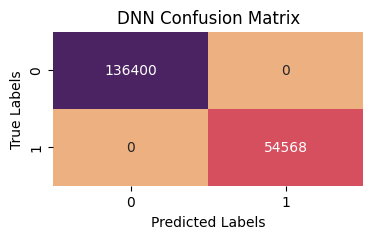

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    136400
           1       1.00      1.00      1.00     54568

    accuracy                           1.00    190968
   macro avg       1.00      1.00      1.00    190968
weighted avg       1.00      1.00      1.00    190968



In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
# Define the model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid') # Output layer for binary classification
])

earlystopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_binary_train, epochs=25, batch_size=800,
          callbacks=[earlystopping],validation_split=0.2,
         ) # Adjust epochs and batch size as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_binary_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
y_pred_dnn = (model.predict(X_test) > 0.5).astype("int32") # Adjust threshold if necessary

#Further analysis (confusion matrix, classification report)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

cm_dnn = confusion_matrix(y_binary_test, y_pred_dnn)
plt.figure(figsize=(4, 2))
sns.heatmap(cm_dnn, annot=True, cmap="flare", fmt="d", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("DNN Confusion Matrix")
plt.show()

print(classification_report(y_binary_test, y_pred_dnn))

15-class classification, deep neural network:

In [ ]:
from keras.callbacks import EarlyStopping


model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(y_multi_train.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adamw',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

earlystopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, mode='min')
# Train the model
history = model.fit(X_train, y_multi_train, epochs=25, batch_size=800,
                    validation_data=(X_val, y_multi_val),
                    class_weight=class_weights_multi_dict,
                    callbacks=[earlystopping]  )


# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_multi_test)
print('Test accuracy:', test_acc)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Make predictions on the test set
y_pred_dnn = model.predict(X_test)
y_pred_dnn_classes = np.argmax(y_pred_dnn, axis=1)
y_true_classes = np.argmax(y_multi_test, axis=1)

# Generate and print the classification report
print(classification_report(y_true_classes, y_pred_dnn_classes))

# Calculate and plot the confusion matrix
cm_dnn = confusion_matrix(y_true_classes, y_pred_dnn_classes)
sns.heatmap(cm_dnn, annot=True, cmap='flare', fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('DNN Confusion Matrix')
plt.show()


In [ ]:

model.save('my_model_multi.keras')


NEXT-STEPS: hyper parameter tuning and using stratified k-fold validation